In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

import moscot as mt
from moscot import datasets
from moscot.problems.space import AlignmentProblem

import scanpy as sc
import squidpy as sq

In [14]:
adata_moscot = datasets.sim_align()
adata_moscot

AnnData object with n_obs × n_vars = 1200 × 500
    obs: 'batch'
    uns: 'batch_colors'
    obsm: 'spatial'

In [9]:
adata.obsm['spatial']

array([[-2.05625147, -1.13202746],
       [-1.86692801, -1.15581226],
       [-1.67186904, -1.183571  ],
       ...,
       [ 1.14104981,  1.20655041],
       [ 1.28448424,  1.21192957],
       [ 1.43614658,  1.22027455]])

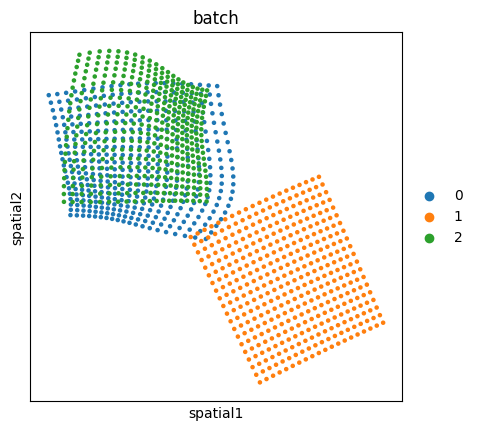

In [8]:
sc.pl.spatial(adata, color="batch", spot_size = 0.1)

In [10]:
groups = adata.obs.groupby("batch").indices
adata_list = [adata[i] for i in groups.values()]
adata_list

[View of AnnData object with n_obs × n_vars = 400 × 500
     obs: 'batch'
     uns: 'batch_colors'
     obsm: 'spatial',
 View of AnnData object with n_obs × n_vars = 400 × 500
     obs: 'batch'
     uns: 'batch_colors'
     obsm: 'spatial',
 View of AnnData object with n_obs × n_vars = 400 × 500
     obs: 'batch'
     uns: 'batch_colors'
     obsm: 'spatial']

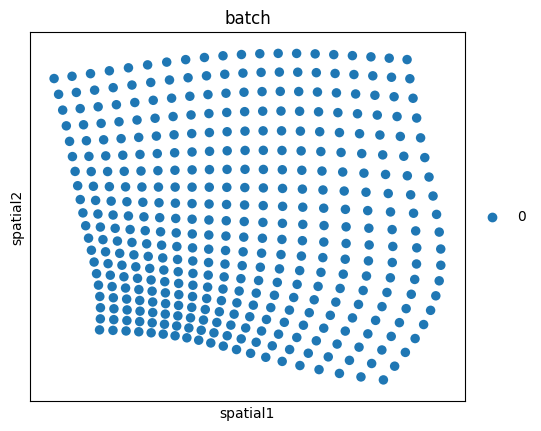

In [12]:
sc.pl.spatial(adata_list[0], color="batch", spot_size = 0.1)

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
input_dir = "D:/bio/splatter/data/file/origin/"
meta = pd.read_csv(input_dir + 'meta_3batch_5celltype.csv', index_col=5)
metrix = pd.read_csv(input_dir + 'matrix_3batch_5celltype.csv', index_col=0)

adata=ad.AnnData( metrix.T )
adata.obs = meta
adata.obsm['spatial'] = adata.obs[['x', 'y']].values
adata

AnnData object with n_obs × n_vars = 1200 × 500
    obs: 'Unnamed: 0', 'x', 'y', 'celltype', 'batch'
    obsm: 'spatial'

In [7]:
adata.obs[['celltype']].to_csv(input_dir + 'label.csv')

In [39]:
adata.obsm['spatial'] = adata_moscot.obsm['spatial']

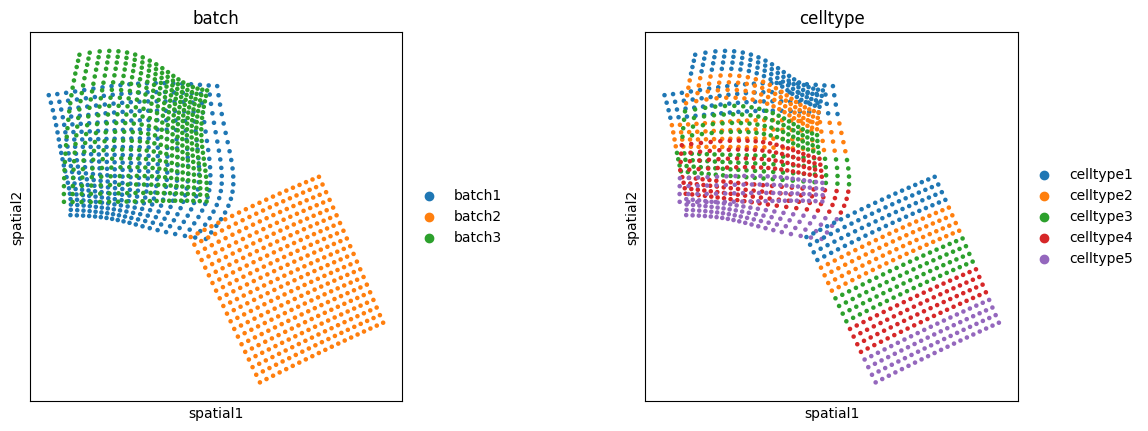

In [40]:
sc.pl.spatial(adata, color=["batch", "celltype"], spot_size = 0.1)

         Falling back to preprocessing with `sc.pp.pca` and default params.


[<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>]

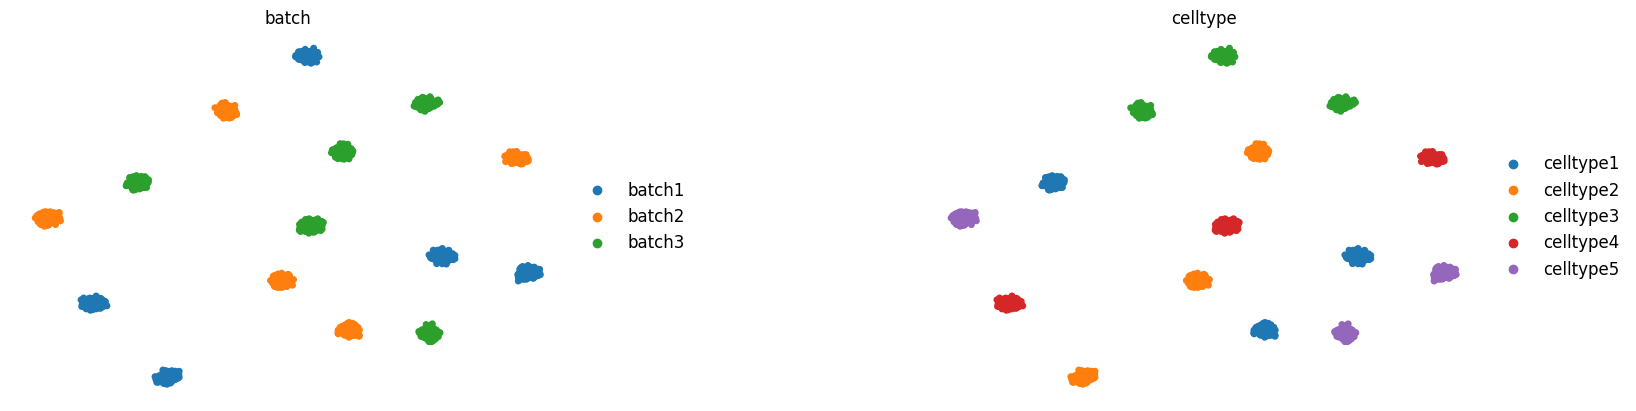

In [41]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.tsne(adata)
sc.pl.umap(adata, color=['batch', 'celltype'], ncols=2, wspace=0.5, 
           show=False, legend_fontsize=12, legend_fontoutline=2, frameon=False)

In [ ]:
adata.write_h5ad(input_dir+"align_3batch_5celltype.h5ad")

In [46]:
type(adata.obsm['spatial'])
df = pd.DataFrame(adata.obsm['spatial'], index = adata.obs_names, columns = ['x', 'y'])
df
df.to_csv(input_dir + 'coord.csv')